In [1]:
#-----------------------------------------------------------------------------------------#
#Membres du groupe : El Hadji Mamadou Dia & Mohamadou Lamine Ndiongue & Mamadou Sall
#Universite : Gaton Berger de Saint Louis
#UFR : SAT
#Parcours : Cryptotologie, Codage et Application(CCA)
#Niveau : Master II
#Module : Cryptanalyse II
#Annee Universitaire : 2021/2022
#-------------------------------------------------------------------------------------------#
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy.ma as ma

In [2]:
#-----------------------------------------------------------------------------------------#
#Membres du groupe : El Hadji Mamadou Dia & Mohamadou Lamine Ndiongue & Mamadou Sall
#Universite : Gaton Berger de Saint Louis
#UFR : SAT
#Parcours : Cryptotologie, Codage et Application(CCA)
#Niveau : Master II
#Module : Cryptanalyse II
#Annee Universitaire : 2021/2022
#-------------------------------------------------------------------------------------------#
def add_mod(a, b, p):
    assert a < p
    assert b < p
    
    return (a + b) % p

def mul_mod(a, b, p):
    assert a < p
    assert b < p
    
    return (a * b) % p

def sub_mod(a, b, p):
    assert a < p
    assert b < p
    
    return (a - b) % p

def inv_mod(a, p):
    for i in range(p):
        if (a * i) % p == 1:
            return i

def div_mod(a, b, p):
    assert a < p
    assert b < p
    inv = inv_mod(b, p)
    return (a * inv) % p

In [3]:
#-----------------------------------------------------------------------------------------#
#Membres du groupe : El Hadji Mamadou Dia & Mohamadou Lamine Ndiongue & Mamadou Sall
#Universite : Gaton Berger de Saint Louis
#UFR : SAT
#Parcours : Cryptotologie, Codage et Application(CCA)
#Niveau : Master II
#Module : Cryptanalyse II
#Annee Universitaire : 2021/2022
#-------------------------------------------------------------------------------------------#

class EdwardCurve:
    def __init__(self, d, field = None):

        assert d != 0 and d != 1

        self.d = d
        self.field = field
        self.points = []
        
        if field != None:
            assert self.verify_square_mod(d, field) == False
            
    def verify_square_mod(self, d, p):
        for i in range(p):
            if (i * i - d) % p == 0:
                return True
        return False
        
    def compute_points(self):
        self.points = []
        limit = int((self.field - 1)/2)
        for i in range(-limit, limit + 1):
            for j in range(i, limit + 1):
                left_side = i*i + j * j
                right_side = 1 + self.d * i * i * j * j
                
                if (left_side - right_side)%self.field == 0:
                    self.points.append([i, j])
                    if i != j:
                        self.points.append([j, i])
                        
        self.points = np.array(self.points)
        
        
    def plot_real(self, ax):
        if self.d < 0:
            xs = np.concatenate([
                np.arange(-1, -0.9, 0.01), 
                np.arange(-0.9, -0.1, 0.1),
                np.arange(-0.1, 0.1, 0.01),
                np.arange(0.1, 0.9, 0.1),
                np.arange(0.9, 1.01, 0.01)])

            delta = 4 * (self.d * xs* xs - 1) * (xs * xs - 1)
            ys = np.sqrt(delta) / (2 * (1 - self.d * xs * xs))
            xs = np.concatenate([xs, xs[::-1]])
            ys = np.concatenate([ys, -ys[::-1]])
            ax.plot(xs, ys)
        elif self.d > 1:
            xs = np.concatenate([np.arange(-10, -2, 1), np.arange(-2, -1.01, 0.01)])
            delta = 4 * (self.d * xs* xs - 1) * (xs * xs - 1)
            ys = np.sqrt(delta) / (2 * (1 - self.d * xs * xs))
            xs = np.concatenate([xs, xs[::-1]])
            ys = np.concatenate([ys, -ys[::-1]])
            
            xs1 = xs.copy()
            ys1 = ys.copy()
            
            xs = np.concatenate([np.arange(1, 2, 0.01), np.arange(2, 10, 1), ])
            delta = 4 * (self.d * xs* xs - 1) * (xs * xs - 1)
            ys = np.sqrt(delta) / (2 * (1 - self.d * xs * xs))
            xs = np.concatenate([xs[::-1], xs])
            ys = np.concatenate([ys[::-1], -ys])
            
            xs2 = xs.copy()
            ys2 = ys.copy()

            xs = np.arange(-1/self.d, 1/self.d, 0.01)
            delta = 4 * (self.d * xs* xs - 1) * (xs * xs - 1)
            ys = np.sqrt(delta) / (2 * (1 - self.d * xs * xs))
            
            xs3 = xs.copy()
            ys3 = ys.copy()
            xs4 = xs.copy()
            ys4 = -ys.copy()
            
            xs_ = ma.array(np.concatenate([xs1, xs2, xs3, xs4]))
            ys_ = ma.array(np.concatenate([ys1, ys2, ys3, ys4]))
            
            xs_[len(xs1)] = ma.masked
            xs_[len(xs1) + len(xs2)] = ma.masked
            xs_[len(xs1) + len(xs2) + len(xs3)] = ma.masked
            
            ys_[len(ys1)] = ma.masked
            ys_[len(ys1) + len(ys2)] = ma.masked
            ys_[len(ys1) + len(ys2) + len(ys3)] = ma.masked
            
            ax.plot(xs_, ys_)
        else:
            
            xs = np.concatenate([np.arange(-10, -1/self.d -1, 1), np.arange(-1/self.d - 1, -1/self.d, 0.01)])
            delta = 4 * (self.d * xs* xs - 1) * (xs * xs - 1)
            ys = np.sqrt(delta) / (2 * (1 - self.d * xs * xs))
            
            xs1 = xs.copy()
            ys1 = ys.copy()
            xs2 = xs.copy()
            ys2 = -ys.copy()

            xs = np.concatenate([np.arange(1/self.d, 1/self.d + 1, 0.01), np.arange(1/self.d + 1, 10, 1), ])
            delta = 4 * (self.d * xs* xs - 1) * (xs * xs - 1)
            ys = np.sqrt(delta) / (2 * (1 - self.d * xs * xs))
            
            xs3 = xs.copy()
            ys3 = ys.copy()
            xs4 = xs.copy()
            ys4 = -ys.copy()
            
            xs_ = ma.array(np.concatenate([xs1, xs2, xs3, xs4]))
            ys_ = ma.array(np.concatenate([ys1, ys2, ys3, ys4]))
            
            xs_[len(xs1)] = ma.masked
            xs_[len(xs1) + len(xs2)] = ma.masked
            xs_[len(xs1) + len(xs2) + len(xs3)] = ma.masked
            
            ys_[len(ys1)] = ma.masked
            ys_[len(ys1) + len(ys2)] = ma.masked
            ys_[len(ys1) + len(ys2) + len(ys3)] = ma.masked
            
            ax.plot(xs_, ys_)
        
    def plot_finite_field(self, ax):
        ax.scatter(self.points[:, 0], self.points[:, 1])
        
        
        
    def plot(self, ax = None):
        
        if ax == None:
            fig = plt.figure(figsize=(5, 5))
            ax = fig.add_subplot(111) 
            
        if self.field == None:
            self.plot_real(ax)
        else:
            #Verify if points already computed
            if len(self.points) == 0:
                self.compute_points()
            self.plot_finite_field(ax)

    def plot_points(self, list_points, ax = None):
        
        if ax == None:
            fig = plt.figure(figsize=(5, 5))
            ax = fig.add_subplot(111) 
        
        if self.field == None:
            self.plot_real(ax)
        else:
            #Verify if points already computed
            if len(self.points) == 0:
                self.compute_points()
            self.plot_finite_field(ax)
            
        for (P, name) in list_points:
            ax.scatter(P[0], P[1], c = "#009900", s = 30, edgecolors='b', zorder = 5)
            ax.annotate(name, (P[0] + np.random.uniform(0, 0.05), P[1] + np.random.uniform(0, 0.05)), fontsize = 18)
       
        
        
    def verify_point(self, P):
        left_side = P[0]*P[0] + P[1]*P[1]
        right_side = 1 + self.d * P[0]*P[0] *  P[1]*P[1]
        if self.field == None:
        
            return abs(left_side - right_side) < 1e-4
        else:
            return (left_side - right_side)%self.field == 0
    
        
    def add(self, P, Q, plot = False, ax = None):
        """
        Add two points from the curve P + Q = R
        """
        
        if not (self.verify_point(P) and self.verify_point(Q)):
            raise Exception("Points not in curve.")
            
        if self.field == None:
            common_term = self.d * P[0] * P[1] * Q[0] * Q[1]
        
            x = (P[0]*Q[1] + P[1]*Q[0]) / (1 + common_term)
            y = (P[1]*Q[1] - P[0]*Q[0]) / (1 - common_term)
        else:
            
            
            common_term = mul_mod(self.d, P[0], self.field)
            common_term = mul_mod(common_term, P[1], self.field)
            common_term = mul_mod(common_term, Q[0], self.field)
            common_term = mul_mod(common_term, Q[1], self.field)
            
            
            den1 = add_mod(1, common_term, self.field)
            num1 = add_mod(
                mul_mod(P[0], Q[1], self.field),
                mul_mod(P[1], Q[0], self.field),
                self.field
            )
            
            x = div_mod(num1, den1, self.field)
            
            
          
            den2 = sub_mod(1, common_term, self.field)
            num2 = sub_mod(
                mul_mod(P[1], Q[1], self.field),
                mul_mod(P[0], Q[0], self.field),
                self.field
            )
            

            y = div_mod(num2, den2, self.field)
            
            if x > np.floor(self.field/2):
                x -= self.field
            if y > np.floor(self.field/2):
                y -= self.field
                
        R = np.array([x, y])
        
        
            
        if plot:
            self.plot_points([(P, "P"), (Q, "Q"), (R, "P+Q")], ax)
            
        assert self.verify_point(R)
     
        return R
        
        
    def inverse(self, P, plot = False, ax = None):
        """
        Return the inverse point of P, i.e., the point Q such that P + Q = 0 
        """
        
        if not (self.verify_point(P)):
            raise Exception("Points not in curve.")
        
        Q = np.array([-P[0], P[1]])
        
        if plot:
            self.plot_points([(P, "P"), (Q, "- P")], ax)
            
        return Q
    
    def multiply_by_int(self, P, k, plot = False, ax = None):
        """
        Return the multiplication of point P by int value k, 
        by doing the sum P + P + \dots + P = kP
        """
        
        if not (self.verify_point(P)):
            raise Exception("Points not in curve.")
        
        list_points = []
        kP = np.array([0, 1])
        for i in range(k):
            kP = self.add(kP, P)
            list_points.append((kP, {i+1}))
            
        if plot:
            self.plot_points(list_points, ax)
            
        return kP

    def is_equal(self, P, Q):
        """
        Verify if poitns P and Q are the same point.
        """

        if self.field == None:
            return abs(P[0] - Q[0]) + abs(P[1] - Q[1]) < 1e-5
        else:
            return P[0] == Q[0] and P[1] == Q[1]

    def find_order(self, P):
        """
        Find order of point P, i.e., find n such that nP = (0, 1)
        """

        if self.field == None:
            raise Exception("Not implemeted.")
        n = 1
        nP = P
        one = [0, 1]
        while not self.is_equal(nP, one):
            nP = self.add(nP, P)
            n +=1
        
        return n

    def point_big_order(self, n = None):

        if self.field == None:
            raise Exception("Not implemented.")

        if len(self.points) == 0:
            self.compute_points()

        orders = []
        for P in self.points:
            o = self.find_order(P)
            orders.append(o)
            if n != None and o > n:
                break

        return np.max(orders), self.points[np.argmax(orders)]

# Courbe Edward: Representation Graphique sur un FiniteField

________________________________________________
------------- | Courbe Edwards | ---------------
________________________________________________
-------- | Representation graphique | ----------
________________________________________________


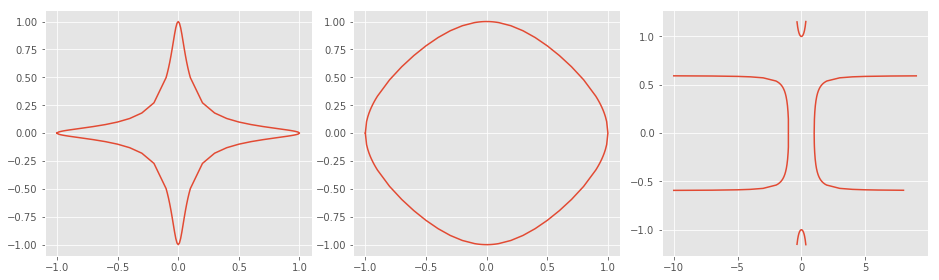

In [4]:
#-----------------------------------------------------------------------------------------#
#Membres du groupe : El Hadji Mamadou Dia & Mohamadou Lamine Ndiongue & Mamadou Sall
#Universite : Gaton Berger de Saint Louis
#UFR : SAT
#Parcours : Cryptotologie, Codage et Application(CCA)
#Niveau : Master II
#Module : Cryptanalyse II
#Annee Universitaire : 2021/2022
#-------------------------------------------------------------------------------------------#

print("________________________________________________")
print("------------- | Courbe Edwards | ---------------")
print("________________________________________________")
print("-------- | Representation graphique | ----------")
print("________________________________________________")
fig, ax = plt.subplots(figsize=(13, 4), nrows = 1, ncols = 3)
plt.tight_layout()
#Pour d = -300
d0 = -300
E0 = EdwardCurve(d0)
E0.plot(ax[0])

#Pour d = -0.9
d1 = -0.9
E1 = EdwardCurve(d1)
E1.plot(ax[1])

#Pour d = sqrt(8)
d2 = sqrt(8)
E2 = EdwardCurve(d2)
E2.plot(ax[2])

# Courbe Edward: Representation Graphique sur un RealField

________________________________________________
------------- | Courbe Edwards | ---------------
________________________________________________
-------- | Representation graphique | ----------
________________________________________________


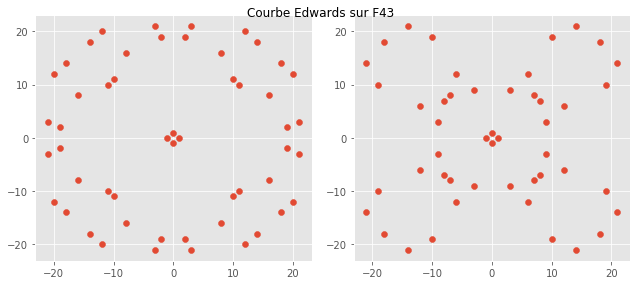

In [5]:
#-----------------------------------------------------------------------------------------#
#Membres du groupe : El Hadji Mamadou Dia & Mohamadou Lamine Ndiongue & Mamadou Sall
#Universite : Gaton Berger de Saint Louis
#UFR : SAT
#Parcours : Cryptotologie, Codage et Application(CCA)
#Niveau : Master II
#Module : Cryptanalyse II
#Annee Universitaire : 2021/2022
#-------------------------------------------------------------------------------------------#

print("________________________________________________")
print("------------- | Courbe Edwards | ---------------")
print("________________________________________________")
print("-------- | Representation graphique | ----------")
print("________________________________________________")
fig, ax = plt.subplots(figsize=(9, 4), nrows = 1, ncols = 2)
plt.tight_layout()

p = 43

#Pour d = -25
d0 = -25
E0 = EdwardCurve(d0, p)
E0.plot(ax[0])

#Pour d = 20
d1 = 20
E1 = EdwardCurve(d1, p)
E1.plot(ax[1])
    
plt.suptitle("Courbe Edwards sur F43")
plt.tight_layout()
plt.show()

# Calcul sur les points du courbe 

________________________________________________
------------- | Courbe Edwards | ---------------
________________________________________________
--------- | 1. Addition de deux points | ----------
________________________________________________
________________________________________________
----------- | 2. Inverse d'un point | -------------
________________________________________________
________________________________________________
---- | 3. Multiplication scalaire d'un point | ----
________________________________________________


Text(0.5,1,"Multiplication scalaire d'un point")

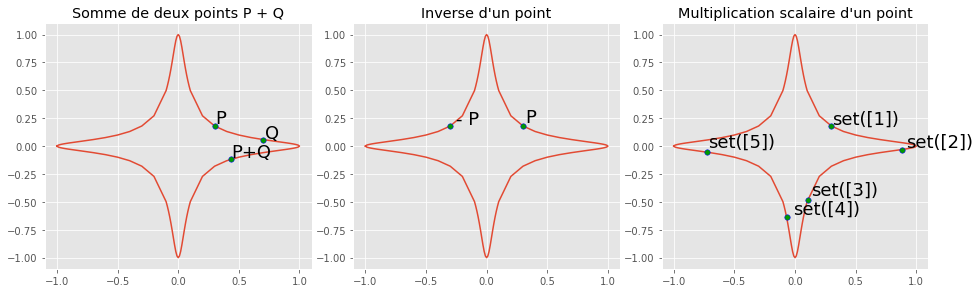

In [6]:
#Membres du groupe : El Hadji Mamadou Dia & Mohamadou Lamine Ndiongue & Mamadou Sall
#Universite : Gaton Berger de Saint Louis
#UFR : SAT
#Parcours : Cryptotologie, Codage et Application(CCA)
#Niveau : Master II
#Module : Cryptanalyse II
#Annee Universitaire : 2021/2022
#-------------------------------------------------------------------------------------------#

print("________________________________________________")
print("------------- | Courbe Edwards | ---------------")
print("________________________________________________")
print("--------- | 1. Addition de deux points | ----------")
print("________________________________________________")
def solve_problem(d, x):
    delta = 4 * (d * x* x - 1) * (x * x - 1)
    y = np.sqrt(delta) / (2 * (1 - d * x * x))
    return y

P = [0.3, solve_problem(-300, 0.3)]
Q = [0.7, solve_problem(-300, 0.7)]
d = EdwardCurve(-300)

fig, ax = plt.subplots(figsize=(13, 4), nrows = 1, ncols = 3)
plt.tight_layout()

d.add(P, Q, plot = True, ax = ax[0])
ax[0].set_title("Somme de deux points P + Q")

print("________________________________________________")
print("----------- | 2. Inverse d'un point | -------------")
print("________________________________________________")
d.inverse(P, plot = True, ax = ax[1])
ax[1].set_title("Inverse d'un point")

print("________________________________________________")
print("---- | 3. Multiplication scalaire d'un point | ----")
print("________________________________________________")
d.multiply_by_int(P, 5, plot = True, ax = ax[2])
ax[2].set_title("Multiplication scalaire d'un point")


# EdDSA(La signature DSA basee sur les courbes Edwards)

In [7]:
#-----------------------------------------------------------------------------------------#
#Membres du groupe : El Hadji Mamadou Dia & Mohamadou Lamine Ndiongue & Mamadou Sall
#Universite : Gaton Berger de Saint Louis
#UFR : SAT
#Parcours : Cryptotologie, Codage et Application(CCA)
#Niveau : Master II
#Module : Cryptanalyse II
#Annee Universitaire : 2021/2022
#-------------------------------------------------------------------------------------------#
p = pow(2, 255) - 19

base = 15112221349535400772501151409588531511454012693041857206046113283949847762202, 46316835694926478169428394003475163141307993866256225615783033603165251855960

def findPositiveModulus(a, p):
    if a < 0:
        a = (a + p * int(abs(a)/p) + p) % p
    return a

In [8]:
#-----------------------------------------------------------------------------------------#
#Membres du groupe : El Hadji Mamadou Dia & Mohamadou Lamine Ndiongue & Mamadou Sall
#Universite : Gaton Berger de Saint Louis
#UFR : SAT
#Parcours : Cryptotologie, Codage et Application(CCA)
#Niveau : Master II
#Module : Cryptanalyse II
#Annee Universitaire : 2021/2022
#-------------------------------------------------------------------------------------------#
def gcd(a, b):
    while a != 0:
        a, b = b % a, a
    return b

In [9]:
#-----------------------------------------------------------------------------------------#
#Membres du groupe : El Hadji Mamadou Dia & Mohamadou Lamine Ndiongue & Mamadou Sall
#Universite : Gaton Berger de Saint Louis
#UFR : SAT
#Parcours : Cryptotologie, Codage et Application(CCA)
#Niveau : Master II
#Module : Cryptanalyse II
#Annee Universitaire : 2021/2022
#-------------------------------------------------------------------------------------------#
def findModInverse(a, m): 

    if a < 0:
        a = (a + m * int(abs(a)/m) + m) % m

    if gcd(a, m) != 1:
        return None
    u1, u2, u3 = 1, 0, a
    v1, v2, v3 = 0, 1, m
    while v3 != 0:
        q = u3 // v3
        v1, v2, v3, u1, u2, u3 = (u1 - q * v1), (u2 - q * v2), (u3 - q * v3), v1, v2, v3
    return u1 % m

In [10]:
#-----------------------------------------------------------------------------------------#
#Membres du groupe : El Hadji Mamadou Dia & Mohamadou Lamine Ndiongue & Mamadou Sall
#Universite : Gaton Berger de Saint Louis
#UFR : SAT
#Parcours : Cryptotologie, Codage et Application(CCA)
#Niveau : Master II
#Module : Cryptanalyse II
#Annee Universitaire : 2021/2022
#-------------------------------------------------------------------------------------------#
def applyDoubleAndAddMethod(P, k, a, d, mod):

    additionPoint = (P[0], P[1])

    kAsBinary = bin(k)
    kAsBinary = kAsBinary[2:len(kAsBinary)] 
    
    for i in range(1, len(kAsBinary)):
        currentBit = kAsBinary[i: i+1]
        additionPoint = pointAddition(additionPoint, additionPoint, a, d, mod)
        
        if currentBit == '1':
            additionPoint = pointAddition(additionPoint, P, a, d, mod)

    return additionPoint

In [11]:
#-----------------------------------------------------------------------------------------#
#Membres du groupe : El Hadji Mamadou Dia & Mohamadou Lamine Ndiongue & Mamadou Sall
#Universite : Gaton Berger de Saint Louis
#UFR : SAT
#Parcours : Cryptotologie, Codage et Application(CCA)
#Niveau : Master II
#Module : Cryptanalyse II
#Annee Universitaire : 2021/2022
#-------------------------------------------------------------------------------------------#
def pointAddition(P, Q, a, d, mod):
    x1 = P[0]; y1 = P[1]
    x2 = Q[0]; y2 = Q[1]
    
    x3 = (((x1*y2 + y1*x2) % mod) * findModInverse(1+d*x1*x2*y1*y2, mod)) % mod
    y3 = (((y1*y2 - a*x1*x2) % mod) * findModInverse(1- d*x1*x2*y1*y2, mod)) % mod
    
    return x3, y3
a = -1; d = findPositiveModulus(-121665 * findModInverse(121666, p), p)
x0 = base[0]; y0 = base[1]

In [12]:
#-----------------------------------------------------------------------------------------#
#Membres du groupe : El Hadji Mamadou Dia & Mohamadou Lamine Ndiongue & Mamadou Sall
#Universite : Gaton Berger de Saint Louis
#UFR : SAT
#Parcours : Cryptotologie, Codage et Application(CCA)
#Niveau : Master II
#Module : Cryptanalyse II
#Annee Universitaire : 2021/2022
#-------------------------------------------------------------------------------------------#
print("________________________________________________")
print("----------------- | EdDSA | --------------------")
print("________________________________________________")
print("------------- | Generation de cle | ------------")
print("________________________________________________")
import random
def genkeyEdDSA(n):
    priv = random.getrandbits(n)
    pub = applyDoubleAndAddMethod(base, priv, a, d, p)
    return pub, priv
A, a = genkeyEdDSA(1024)
print("La cle publique est: ", A)
print("La cle prive est:", a)

________________________________________________
----------------- | EdDSA | --------------------
________________________________________________
------------- | Generation de cle | ------------
________________________________________________
('La cle publique est: ', (2796918726442849897568943384070121980798773524763523736738419508841345308549, 1759626318506675943670579832762625468048566154790937710649950275690918362420))
('La cle prive est:', 123657750580730898992803048399430329603326312313272265791023102226882316271351399398081707350133029635045653160739375388647999199048266404102648256530124486659018973706813675028393431771132761380077293127367860105977043651635350115501476949086668702484650959781513138503199409818643567540362094094934709981332L)


In [13]:
#-----------------------------------------------------------------------------------------#
#Membres du groupe : El Hadji Mamadou Dia & Mohamadou Lamine Ndiongue & Mamadou Sall
#Universite : Gaton Berger de Saint Louis
#UFR : SAT
#Parcours : Cryptotologie, Codage et Application(CCA)
#Niveau : Master II
#Module : Cryptanalyse II
#Annee Universitaire : 2021/2022
#-------------------------------------------------------------------------------------------#

print("________________________________________________")
print("------------- | EdDSA | -----------------")
print("________________________________________________")
print("------------- | Signature | -----------------")
print("________________________________________________")
def signEdDSA(message):
    r = hash(hash(message) + message) % p
    R = applyDoubleAndAddMethod(base, r, a, d, p)
    h = hash(R[0] + A[0] + message) % p
    s = (r + h * a)
    return s,R
c, B = signEdDSA(1234)
print("La signature (R, s) est:")
print("R = : ",B)
print("s = : ",c)

________________________________________________
------------- | EdDSA | -----------------
________________________________________________
------------- | Signature | -----------------
________________________________________________
La signature (R, s) est:
('R = : ', (23103016745674935762266079730924852410270983775454655033100625413426993477895, 34335065395454518959959025517480973113532370849290768164751832305640052052765))
('s = : ', 966669434531347113084685013566396568826218103342282912210318975433959993419485474463094284776359866622841283559712611231818197374867484788342130657599561942012238066615030421640025962591258225262056864247166028505370646766667740383394452782736918426122517490868971667664913546871719838605403807052408657527458320350568376871384)


In [14]:
#-----------------------------------------------------------------------------------------#
#Membres du groupe : El Hadji Mamadou Dia & Mohamadou Lamine Ndiongue & Mamadou Sall
#Universite : Gaton Berger de Saint Louis
#UFR : SAT
#Parcours : Cryptotologie, Codage et Application(CCA)
#Niveau : Master II
#Module : Cryptanalyse II
#Annee Universitaire : 2021/2022
#-------------------------------------------------------------------------------------------#
print("________________________________________________")
print("------------- | EdDSA | -----------------")
print("________________________________________________")
print("-------- | Verification signature | ------------")
print("________________________________________________")
def verifEdDSA(message):
    h = hash(B[0] + A[0] + message) % p
    P1 = applyDoubleAndAddMethod(base, c, a, d, p)
    P2 = pointAddition(B, applyDoubleAndAddMethod(A, h, a, d, p), a, d, p)
    if P1[0] == P2[0] and P1[1] == P2[1]:
        return True
    else:
        return False
verifEdDSA(1254)

________________________________________________
------------- | EdDSA | -----------------
________________________________________________
-------- | Verification signature | ------------
________________________________________________


False

# Cryptosystem KMOV base sur les courbes Edwards

In [40]:
from sage.all import *

def get_C2_prime():
    while True:
        p = random_prime(2^256-1,False,2^255)
        if p % 3 == 2:
            return p

In [59]:
#-----------------------------------------------------------------------------------------#
#Membres du groupe : El Hadji Mamadou Dia & Mohamadou Lamine Ndiongue & Mamadou Sall
#Universite : Gaton Berger de Saint Louis
#UFR : SAT
#Parcours : Cryptotologie, Codage et Application(CCA)
#Niveau : Master II
#Module : Cryptanalyse II
#Annee Universitaire : 2021/2022
#-------------------------------------------------------------------------------------------#
print("____________________________________________________")
print("------------- | Crptosystem KMOV | -----------------")
print("____________________________________________________")
print("------------- | Generation de cle | ----------------")
print("____________________________________________________")
def genkeyKMOV():
    e = 65537
    p = get_C2_prime()
    q = get_C2_prime()
    assert (p % 3) == (q % 3) == 2
    n = p*q
    k = inverse_mod(e, (p+1)*(q+1))
    assert e*k % ((p+1)*(q+1)) == 1
    return n, e, k
pub1, pub2, priv = genkeyKMOV()
print("La cle publique est :", [pub1,pub2])
print("\n")
print("La cle prive est :", priv)

____________________________________________________
------------- | Crptosystem KMOV | -----------------
____________________________________________________
------------- | Generation de cle | ----------------
____________________________________________________
('La cle publique est :', [8558684006034409388150093866019838388347045573159994983548167484273252240001272643263594821819338999650733860759595796874715542051834101996128188245826689, 65537])


('La cle prive est :', 4849446448267112596236714918607514514135208970714607835559724298655766188263334863848954246840871432723824851412929140832369010581613035341853314664743841)


In [64]:
#-----------------------------------------------------------------------------------------#
#Membres du groupe : El Hadji Mamadou Dia & Mohamadou Lamine Ndiongue & Mamadou Sall
#Universite : Gaton Berger de Saint Louis
#UFR : SAT
#Parcours : Cryptotologie, Codage et Application(CCA)
#Niveau : Master II
#Module : Cryptanalyse II
#Annee Universitaire : 2021/2022
#-------------------------------------------------------------------------------------------#
print("____________________________________________________")
print("------------- | Crptosystem KMOV | -----------------")
print("____________________________________________________")
print("----------------- | Chiffrement | ------------------")
print("____________________________________________________")
def encryptKMOV(pub1, pub2):
    Xm, Ym = randint(1, pub1), randint(1, pub1)
    Message = (Xm, Ym)
    d1 = (pow(Ym, 2, pub1) - pow(Xm, 3, pub1)) % pub1
    E1 = EllipticCurve(Zmod(pub1), [0, d1])
    M = E1(Xm, Ym)
    Chiffre = pub2*M
    return Chiffre, Message
Chiffre, Message = encryptKMOV(pub1, pub2)
print "Le Message original est: ",Message
print
print "Le message chiffre est: ",Chiffre

____________________________________________________
------------- | Crptosystem KMOV | -----------------
____________________________________________________
----------------- | Chiffrement | ------------------
____________________________________________________
Le Message original est:  (6519559018528251176976678904049387031942574874034529953204661572408204764338549885895791472020018789827075447491818927320902142585567102009060262229314470L, 7011902248380327989363601010218490282601317513145782563914971442837886466353318625287280055262424617997566326965013741844254889560662876247156476159132081L)

Le message chiffre est:  (1178462846725473862597369130421145929333551615732391860319020859202829579596835046182825035129447610937939872874738677155170700200618433210291490568161314 : 6046331336710537639580879539329119674924563221652554465867006900052640537793873106703766741314329761416290019754515506266054950592932055964752482955822714 : 1)


In [65]:
#-----------------------------------------------------------------------------------------#
#Membres du groupe : El Hadji Mamadou Dia & Mohamadou Lamine Ndiongue & Mamadou Sall
#Universite : Gaton Berger de Saint Louis
#UFR : SAT
#Parcours : Cryptotologie, Codage et Application(CCA)
#Niveau : Master II
#Module : Cryptanalyse II
#Annee Universitaire : 2021/2022
#-------------------------------------------------------------------------------------------#
print("____________________________________________________")
print("------------- | Crptosystem KMOV | -----------------")
print("____________________________________________________")
print("----------------- | dechiffrement | ----------------")
print("____________________________________________________")
def decryptKMOV(Chiffre, pub1, pub2, priv):
    Xc, Yc = Chiffre.xy()
    d2 = (pow(Yc, 2, pub1) - pow(Xc, 3, pub1)) % pub1
    E2 = EllipticCurve(Zmod(pub1), [0, d2])
    Dechiffre = priv*Chiffre
    return Dechiffre
Dechiffre = decryptKMOV(Chiffre, pub1, pub2, priv)
print "Le message dechiffrer est: ", Dechiffre

____________________________________________________
------------- | Crptosystem KMOV | -----------------
____________________________________________________
----------------- | dechiffrement | ----------------
____________________________________________________
Le message dechiffrer est:  (6519559018528251176976678904049387031942574874034529953204661572408204764338549885895791472020018789827075447491818927320902142585567102009060262229314470 : 7011902248380327989363601010218490282601317513145782563914971442837886466353318625287280055262424617997566326965013741844254889560662876247156476159132081 : 1)


In [67]:
#-----------------------------------------------------------------------------------------#
#Membres du groupe : El Hadji Mamadou Dia & Mohamadou Lamine Ndiongue & Mamadou Sall
#Universite : Gaton Berger de Saint Louis
#UFR : SAT
#Parcours : Cryptotologie, Codage et Application(CCA)
#Niveau : Master II
#Module : Cryptanalyse II
#Annee Universitaire : 2021/2022
#-------------------------------------------------------------------------------------------#
print("____________________________________________________")
print("------------- | Crptosystem KMOV | -----------------")
print("____________________________________________________")
print("----------------- | Verification | ----------------")
print("____________________________________________________")
def Verif():
    decX, decY = Dechiffre.xy()
    if Message[0] == decX and Message[1] == decY:
        print "True: Le dechiffrement est effectue avec succes"
    else:
        print "False: Le dechiffrement n'est pas effectue avec succes"
Verif()

____________________________________________________
------------- | Crptosystem KMOV | -----------------
____________________________________________________
----------------- | Verification | ----------------
____________________________________________________
True: Le dechiffrement est effectue avec succes
